In [6]:
%matplotlib inline

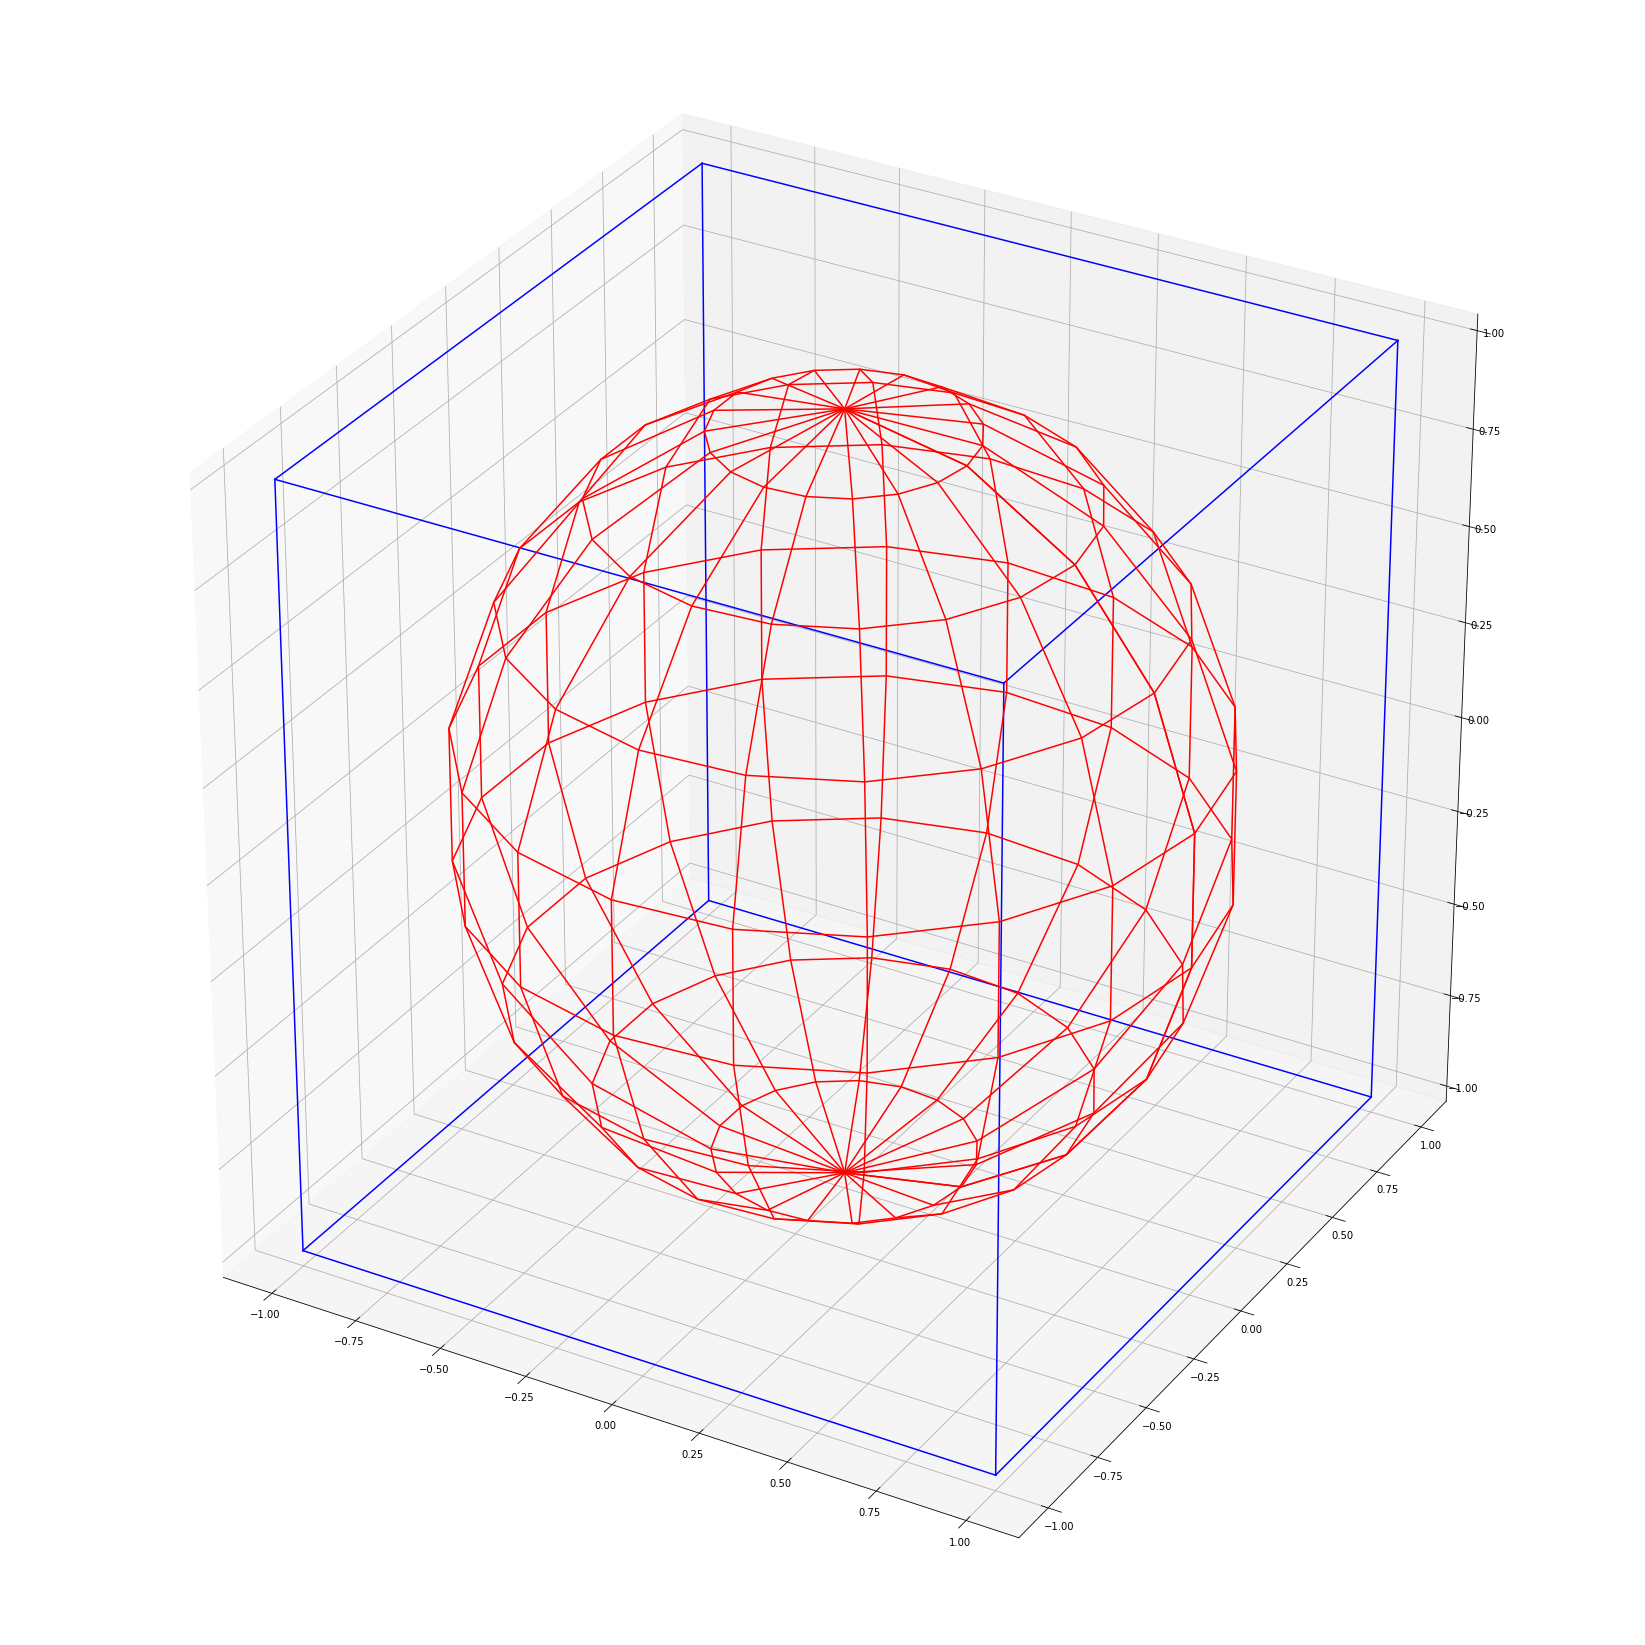

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure(figsize=(30,30))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")

In [31]:

    

x = np.linspace(-3,3)
x, y = np.mgrid[1:2:0.2,1:2:0.2]

In [ ]:
    
dplot = Dplot3D()
#f(1,2)
f = lambda x1,x2 : x1**2 + x2**2

dplot.append_funct(f)
f = lambda x1,x2 : 10 - x1**2 + x2**2

dplot.append_funct(f,color='r')

dplot.append_vector(0,-15,0, -3, 20, 20)
dplot.append_vector(-20,-20,-200, -3, -3, -3)
dplot.show()


In [151]:
class Dplot3D:
    """
    
    """
    def __init__(self, _range =20, fig_size=(20,20),elev=10,azim=10,**kwargs):
        self.fig_size = fig_size
        self.fig = plt.figure()
        self.fig = plt.figure(figsize=fig_size)
        self.ax = self.fig.gca(projection='3d')
       
        #self.ax = fig.add_subplot(111, projection='3d')
        #self.ax.set_aspect("equal")
        self.ax.set_xlabel('X',fontsize=30)
        #self.ax.view_init(elev=elev, azim=azim)
        self.ax.set_ylabel('Y',fontsize=30)
        self.ax.set_zlabel('Z',fontsize=30)
        self.range=_range
        
    def _calculate_funct(self,func):
        x, y = np.mgrid[-self.range:self.range:0.1,-self.range:self.range:0.1]
        return  x,y,func(x,y)

        
    def append_funct(self,function,color='b',label=''):
        x,y,z = self._calculate_funct(function)
        self.ax.plot_wireframe(x, y, z,color=color,label=label,rstride=15, cstride=5)
   
    def append_curve(self,x_funct, y_funct, z_funct,color='b'):
        """
        x= 2+k*2
        y = 3+k*4
        z = 5 + k*4
        """
        
        k = np.linspace(-self.range,self.range)
        x = x_funct(k)
        y = y_funct(k)
        z = z_funct(k)
        if type(z)==int:
            z=np.ones(len(x))*z
        self.ax.plot(x, y, z, color = color)    
            
    def append_circle_xy(self,r,z=0,color='b'):
        theta = np.linspace(0, 2 * np.pi, 100)
        x = r * np.sin(theta)
        y = r * np.cos(theta)
        z = np.ones(len(x))*z
        self.ax.plot(x, y, z, color = color)
       
    def plot_plane(self,z):
        pass
    
    def append_vector(self,x, y, z, dx, dy, dz):
        self.ax.quiver(x, y, z, dx, dy, dz) #
        
    def show(self):
        plt.legend()
        plt.show()
   

        
        




No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

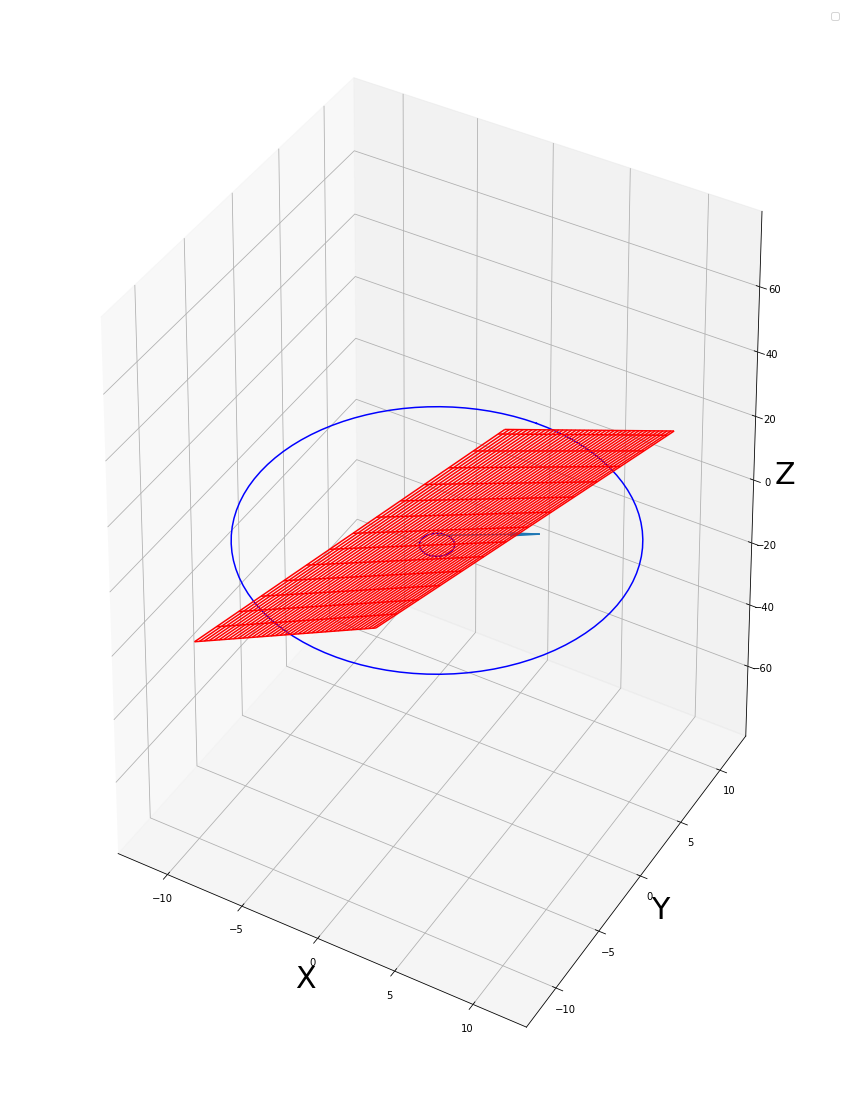

In [144]:
f = lambda x,y :  5*x - 3*y
r=136
z=0
dplot = Dplot3D(_range=10,fig_size=(15,20),elev=0,azim=0)
dplot.append_funct(f,color='r')
dplot.append_circle_xy(np.sqrt(136),0)

dplot.append_circle_xy(1,-3)
dplot.append_vector(0,0,0,5,3,0)
dplot.show()


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

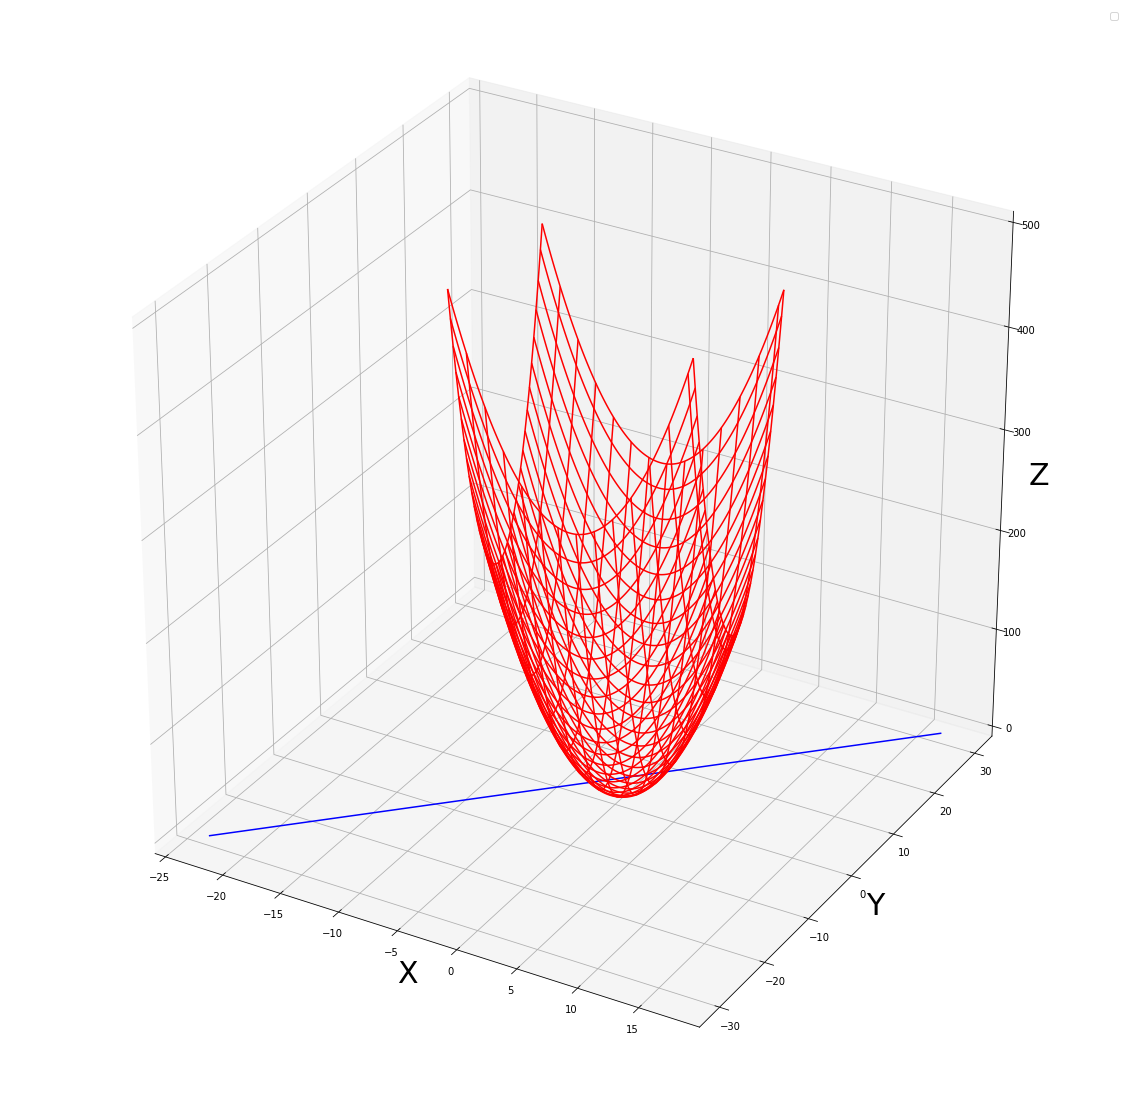

In [156]:
dplot = Dplot3D(_range=10,fig_size=(20,20),elev=0,azim=0)
f = lambda x,y:+2*x**2+3*y**2
dplot.append_funct(f,color='r')
dplot.append_curve(lambda k : 2*k-3,lambda k : 3*k,lambda k : 0)
dplot.show()